In [1]:
from pydstarlite.implementation import *
from pydstarlite.lpa_star import LPAStar
from pydstarlite.dstarlite import DStarLite
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

In [2]:
from pydstarlite.implementation import draw_grid

In [3]:
GRAPH, START, END = grid_from_string("""
#################################################################################
.A..#...........#...#.......#.....#.#...#.....#.......#.....#.....#...........#.#
#.#.#.#######.#.#.#.#.#####.#.###.#.#.#.#####.#.###.#.#####.#####.#.#########.#.#
#.#.#.....#...#...#.....#...#.#.#.#.#.#.....#.#.#.#.#.#...#.#.......#.#.....#...#
#.#.#####.###############.###.#.#.#.#.#####.#.#.#.#.#.#.#.#.#.###.###.#.###.###.#
#.#.#...#.#.........#...#.#...#.#...#...#...#.#...#.#.#.#.#.#...#.....#.#.#...#.#
#.#.#.#.#.#.#######.#.#.#.#####.###.#.#.#.###.#####.#.#.#.#.###.#####.#.#.#.###.#
#.#.#.#.#...#.......#.#.........#...#.#.#.....#...#.#...#.#.#.#.#.....#.#.#...#.#
#.#.#.#.###.#########.#####.#####.###.#.#.#.###.#.#.###.#.#.#.#.#.#####.#.#.#.#.#
#.#.#.#...#...#.....#.#.....#.......#.#.#.#.#...#...#...#.#...#.#.....#...#.#.#.#
#.#.#####.###.#####.#.#.#####.###.#.###.#.#.#.#######.###.###.#.#####.#####.#.#.#
#.#.#...#...#.#.....#.#.#.....#...#.....#.#...#.......#.....#.#...#...#.....#.#.#
#.#.#.#.#.#.#.#.#####.#.#.#####.#########.#####.#####.#.#####.###.#.#########.#.#
#.#...#...#...#.......#.#.#.....#.............#.#...#.#.#.......#.#.....#...#...#
#.###.###########.#####.#.#.#################.#.#.#.#.#.#####.#.#.###.#.#.#.#####
#...#...#.......#.....#...#...#...........#...#.#.#.#.#.....#.#...#...#.#.#.....#
###.###.#.#####.###########.###.#########.#.###.#.#.#######.#.#####.###.###.###.#
#...#...#...#.#.......#.....#...#.......#...#...#.#...#.....#.#.......#.....#...#
#.###.#####.#.#######.#.#####.#####.###.#####.#######.#.#####.#.#################
#...#.#...#...#.....#.#.#.#...#.....#.........#...#...#.....#.#.......#.........#
###.#.#.#.#####.#####.#.#.#.###.#####.#########.#.###.#.###.#.#######.#.#####.#.#
#...#...#...#.#.#.....#.#...#...#...#.#.....#...#.#...#...#.#.#...#...#...#.#.#.#
#.#########.#.#.###.###.#####.#####.#.#####.#.###.#.#######.#.#.#.#.#####.#.#.#.#
#.#...#.....#.#.........#...........#.#...#.#.#...#.#.#.....#.#.#...#...#...#.#.#
#.#.#.#.#####.#####.#####.###########.#.#.#.#.#.###.#.#.#####.#.#####.#.#####.###
#.#.#.#.#.....#...#.#.....#.....#...#...#.....#...#.#.#.#...#.#.#.#...#.....#...#
#.#.#.#.###.#.#.#.#.#.#####.###.#.#.#####.#.#####.#.#.#.#.#.#.#.#.#.#######.#.#.#
#...#.#.#...#.#.#.#.#.......#.#.#.#.#...#.#.....#...#.#.#.#.#.#.#.........#.#.#.#
#####.#.#.###.#.#.#.#########.#.#.###.#.#.#.#########.#.#.#.#.#.#####.###.#.###.#
#...#.#.#.#.#.#.#.#.#.....#...#.#...#.#...#.#...#.....#...#...#.#.....#...#...#.#
#.#.#.#.#.#.#.#.###.#.###.#.###.###.#.#####.#.#.#.###.#######.#.#.###########.#.#
#.#...#.#.#...#.....#.#.#.#.#...#.#.....#...#.#.....#.#.......#...#...#.......#.#
#.#####.#.#.#########.#.#.#.#.#.#.###.###.###.#####.#.#.###########.#.#.#######.#
#.#...#...#.....#...#.#.#.....#.#.#...#...#...#.....#.#.........#...#.#...#.....#
#.###.#########.#.###.#.#########.###.#.###.###.#################.###.#.#.#.###.#
#.....#...#.......#...#.#.#.....#...#.#.#...#...#...#.......#.....#.#...#.#.#...#
#######.#.#.#####.#.###.#.#.###.###.###.#.###.###.#.#.#####.#.#.###.#####.#.#.###
#.....#.#.#...#...#...#.#.#...#.#.......#...#...#.#.#.#...#.#.#...#.....#.#.#.#.#
#.###.#.#####.#.#####.#.#.#####.#.#########.#.#.###.#.#.#.#.#.###.#####.#.###.#.#
#...#.#.....#.#.....#.....#...#.#.#.#.......#.#.#...#...#.#.#...#...#...#...#...#
#.###.#####.#.#####.#######.#.#.#.#.#.#####.#.#.#.###.###.#####.###.#.#####.#.###
#...#.....#...#...#.....#...#...#.#...#...#.#.#...#.#.#.#.......#...#.#.....#...#
#.#.#####.#####.#########.#######.#.#####.#.#.#####.#.#.#########.###.#.#######.#
#.#.#.#...#.......#.#...#.#...#.#...#.......#...#.....#.#...#.....#...#...#.....#
###.#.#.#####.#.#.#.#.#.#.#.#.#.#####.#########.###.###.#.#.#.#####.#.###.#.#.###
#...#...#.....#.#.....#.....#.......#.#.#.....#...#...#.#.#.#.#.....#.#.#...#.#.#
#.#######.#####.#########.#########.#.#.#.###.###.###.#.###.#.###.#.#.#.#####.#.#
#.#.....#...#...#.......#.........#...#.#.#...#...#...#.#...#...#.#.#.#.#.....#.#
#.#.#.#.#####.#########.#######.#######.#.#####.###.###.#.#####.#.###.#.#.#.###.#
#.#.#.#.......#.#...#...........#.......#.......#.#.......#...#...#.....#.#.#...#
#.#.#.#####.###.#.#.###.###.#####.#########.#####.#####.###.#######.#####.#.#.#.#
#.#.#.#.....#...#.#...#.#.#.#...#.#...#.....#.#...#.....#.#...#.....#.....#...#.#
#.#.#.#.#####.###.#.#.#.#.#.#.#.#.###.#.###.#.#.#####.#.#.###.#.#####.#########.#
#.#.#.#.#...#.....#.#...#...#.#...#...#...#.#.#.......#.#.#...#...#...#.........#
#.#.#.#.###.#######.#########.#.###.#####.#.#.###########.#.#######.###.#########
#...#.#...#.#.......#.........#.....#.....#.#.#.......#...#.#.#.....#.#.....#...#
#####.###.#.#.#######.#################.#####.#.#.###.#.###.#.#.#####.#####.###.#
#...#...#...#.......#.#.................#...#...#.#.....#...#...#...............#
#.#.#.#.###########.#.#######.#######.#.#.#.###.#.#####.#.#######.###.#####.#####
#.#...#.........#...#.#...#...#.....#.#...#...#.#...#...#.#.....#.#...#...#.....#
#.#.###########.#.###.#.#.###.#.###.#########.#.###.#####.#.###.#.#.###.#.#####.#
#.#.#.....#.....#...#.#.#.#...#.#...........#.#.#...#.....#.#.#...#.#...#.......#
#.###.#####.#######.#.###.#.###.###########.#.#.#.###.#####.#.#####.#.#########.#
#...#.#.....#...#...#.#...#...#.#...#.....#.#.#.#.#...#.....#.......#.#.......#.#
###.#.#.#.###.#.#.###.#.#####.#.#.#.#.###.#.#.#.#.#.###.###.#########.#.#####.#.#
#...#...#...#.#.#.....#...#...#...#.#.#.......#.#.#.#...#.#.........#.#...#...#.#
#.#.#########.#####.#####.#.#######.#.#####.###.#.#.#.#.#.###.#####.#.#.#.#.#####
#.#.#...............#.....#.#.......#.....#...#.#...#.#...#.#.#.....#.#.#.#.#...#
#.###.#.#####.#######.#####.#.###########.#####.#####.#####.#.#.#####.#.#.#.#.#.#
#...#.#...#...#.......#.#...#.#...........#...#.#.....#.......#.....#.#.#.#.#.#.#
###.#.#####.###.#######.#.###.#############.#.#.#.#################.#.###.#.#.###
#...#.....#...#.#...#...#...#.#.......#.....#...#...#...#...#.....#.#.....#.#...#
#.#######.###.#.#.#.#.###.###.#.###.#.#.###########.###.#.###.###.#.#######.###.#
#...#...#...#...#.#.....#...#...#...#...#.#.............#.#...#.#...#.#...#.....#
###.###.###.#.###.#########.#####.#######.#.#############.#.###.#####.#.#.#####.#
#.#...#.....#.#.............#...#.#...#...#...#.......#...#.#.......#.#.#.#.....#
#.###.#######.#.#.###########.#.#.#.#.#.#####.#.#####.#.#.#.#.#.###.#.#.#.#.#.###
#.....#.....#.#.#.#...#.....#.#...#.#.......#...#...#.#.#.#...#.#.#.#.#.#...#.#.#
#######.###.###.#.###.#.###.#.#####.###.#########.#.#.#.#.#####.#.#.#.#.###.#.#.#
#.......#.......#.....#...#...#.....#.............#...#.#.......#...#...#...#...Z
#################################################################################
""")

In [21]:
came_from, cost_so_far = LPAStar(GRAPH, START, END).compute_shortest_path()

In [19]:
draw_grid(GRAPH, width=1, path=reconstruct_path(came_from, start=START, goal=END))

#################################################################################
.@@@#@@@@@@@@@@@#@@@#@@@@@@@#.....#.#@@@#.....#....@@@#.....#.....#...........#.#
#.#@#@#######.#@#@#@#@#####@#.###.#.#@#@#####.#.###@#@#####.#####.#.#########.#.#
#.#@#@@@@@#...#@@@#@@@..#@@@#.#.#.#.#@#@@@@@#.#.#.#@#@#@@@#.#@@@@@..#.#.....#...#
#.#@#####@###############@###.#.#.#.#@#####@#.#.#.#@#@#@#@#.#@###@###.#.###.###.#
#.#@#...#@#.........#...#@#...#.#...#@@@#@@@#.#...#@#@#@#@#.#@@@#@@@@@#.#.#...#.#
#.#@#.#.#@#.#######.#.#.#@#####.###.#.#@#@###.#####@#@#@#@#.###@#####@#.#.#.###.#
#.#@#.#.#@@@#.......#.#..@@@....#...#.#@#@@@..#@@@#@#@@@#@#.#.#@#@@@@@#.#.#...#.#
#.#@#.#.###@#########.#####@#####.###.#@#.#@###@#@#@###.#@#.#.#@#@#####.#.#.#.#.#
#.#@#.#...#@@@#.....#.#@@@@@#@@@@@@@#.#@#.#@#@@@#@@@#...#@#...#@#@@@@@#...#.#.#.#
#.#@#####.###@#####.#.#@#####@###.#@###@#.#@#@#######.###@###.#@#####@#####.#.#.#
#.#@#@@@#@@@#@#.....#.#@#@@@@@#...#@@@@@#.#@@@#.......#@@@..#.#@@@#@@@#.....#.#.#
#.#@#@#@#@#@#@#.

In [9]:
%pdb

Automatic pdb calling has been turned ON


In [10]:
def empty_image(graph):
    image = 0.5 * np.ones((GRAPH.width, GRAPH.height, 4))
    image[:, :, 3] = 1
    return image

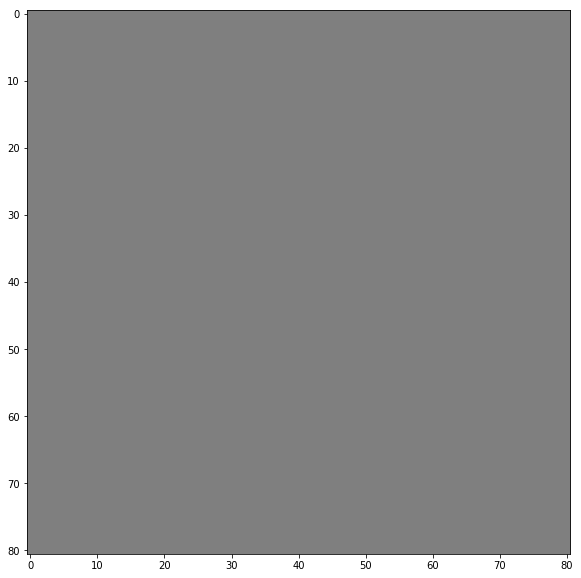

In [11]:
data = empty_image(GRAPH)
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
img = ax.imshow(data)

In [12]:
dstar = DStarLite(GRAPH, START, END, view_range=10)

In [13]:
SIMULATION = dstar.move_to_goal()

In [14]:
def init():
    img.set_data(data)
    return img,

In [15]:
def animate(args):
    (position, observation, walls) = args
    tmp = empty_image(GRAPH)
    tmp[END[1], END[0]] = [0, 0, 1, 1]

    tmp[position[1], position[0]] = [1, 0, 0, 1]
    for (x, y) in walls:
        tmp[y, x] = [0,0,0,1]
    for (x, y) in observation.keys():
        if (x, y) == position:
            continue
        else:
            (r, g, b, a) = tmp[y, x]
            tmp[y, x] = [r, g, b, 0.7]
    img.set_data(tmp)
    return img,

In [16]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=SIMULATION, interval=200, blit=True, save_count=100000)

In [17]:
# Requires ffmpeg installed - `brew install ffmpeg` on Mac
HTML(anim.to_html5_video())